<h1>TAREA 1 - Sergio Alejandro Diaz Pinilla</h1>
<h3>Estudiar e implementar las principales técnicas de interpolación:</h3>
<ul>
            <li>Vecino más cercano.</li>
            <li>Bilineal.</li>
            <li>Bicubica.</li>
            <li>B-splines.</li>
       </ul>


<h1 style="font-size:100%; background-color:rgba(70, 0, 700, 0.2); color:black; text-align:center; line-height : 30px;">
Visión de Máquina &#8212; F. Prieto </h1>

In [1]:
%matplotlib inline
import cv2
import time
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt
from __future__ import division

img = cv2.imread('Fig/luffy.png',0)

def resize(image,d,inter):
    width, height = img.shape[:2]
    img_resize = np.zeros((width*d,height*d),np.uint8)
    
    widthRz, heightRz = img_resize.shape[:2]
    
    x_ratio = width/widthRz
    y_ratio = height/heightRz
    
    x_ratioBL = (width-1)/widthRz
    y_ratioBL = (height-1)/heightRz
    
    px, py  = 0 , 0
    if(inter != "BC"):
        for i in range(widthRz-1):
            for j in range(heightRz-1):
                if(inter == "N"):
                    img_resize[i][j] = nearest(image,i,j,x_ratio,y_ratio)
                if(inter == "BL"):
                    img_resize[i][j] = bilinear(image,i,j,x_ratioBL,y_ratioBL)
    if(inter == "BC"):
        bufferPixels = np.zeros((4,4))
        x_ratioBC = (width-3)/widthRz
        y_ratioBC = (height-3)/heightRz
        for i in range(widthRz-3):
            for j in range(heightRz-3):
                x = int(i*x_ratioBC)
                y = int(j*y_ratioBC)
                xO = (x_ratioBC * i -0.5) - x ;
                yO = (y_ratioBC * j -0.5) - y ;
                
                bufferPixels[0,:] = img[x:x+4,y]
                bufferPixels[1,:] = img[x:x+4,y+1]
                bufferPixels[2,:] = img[x:x+4,y+2]
                bufferPixels[3,:] = img[x:x+4,y+3]
                
                #bufferPixels[0,:] = img[x,y:y+4]
                #bufferPixels[1,:] = img[x+1,y:y+4]
                #bufferPixels[2,:] = img[x+2,y:y+4]
                #bufferPixels[3,:] = img[x+3,y:y+4]
                img_resize[i][j] = int(clamp(bicubic(bufferPixels,yO,xO),0,255))

    return img_resize
print "Listo"

Listo


Para escalado  X5
--- Tiempo en segundos 0.972837924957 ---
--- Tamaño : 5183


(<matplotlib.axes._subplots.AxesSubplot at 0x112c83110>,
 <matplotlib.text.Text at 0x113010a10>)

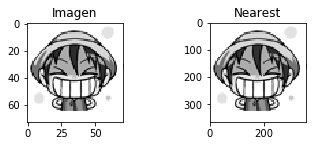

In [9]:
#-nearest
def nearest(img,x,y,x_ratio,y_ratio):
    px = np.floor(x*x_ratio)
    py = np.floor(y*y_ratio)
    return img[int(px)][int(py)]

print("Para escalado  X5")
start_time = time.time()
reziceN_img = resize(img,5,"N")
print("--- Tiempo en segundos %s ---" % (time.time() - start_time))
print("--- Tamaño : " + str(img.shape[:2][0]*img.shape[:2][1]))

plt.figure(1)
plt.subplot(221), plt.imshow(img, cmap=plt.cm.gray), plt.title('Imagen')
plt.subplot(222), plt.imshow(reziceN_img, cmap=plt.cm.gray,interpolation='none'), plt.title('Nearest')

Para escalado  X5
--- Tiempo en segundos 2.77236318588 ---
--- Tamaño : 5183


(<matplotlib.axes._subplots.AxesSubplot at 0x116607810>,
 <matplotlib.text.Text at 0x1166f3c10>)

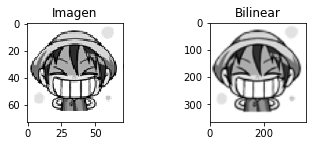

In [2]:
#Bilinear
def bilinear(img,i,j,x_ratioBL,y_ratioBL):
    x = int(i*x_ratioBL)
    y = int(j*y_ratioBL)
    x_diff = (x_ratioBL * i) - x ;
    y_diff = (y_ratioBL * j) - y ;
    #puntos para interpolar
    A = img[x][y]
    B = img[x+1][y]
    C = img[x][y+1]
    D = img[x+1][y+1]

    V = int(A*(1-x_diff)*(1-y_diff) +  B*(x_diff)*(1-y_diff) + C*(y_diff)*(1-x_diff)+  D*(x_diff*y_diff))
    return V

print("Para escalado  X5")
start_time = time.time()
reziceBL_img = resize(img,5,"BL")
print("--- Tiempo en segundos %s ---" % (time.time() - start_time))
print("--- Tamaño : " + str(img.shape[:2][0]*img.shape[:2][1]))

plt.figure(1)
plt.subplot(221), plt.imshow(img, cmap=plt.cm.gray), plt.title('Imagen')
plt.subplot(222), plt.imshow(reziceBL_img, cmap=plt.cm.gray,interpolation='none'), plt.title('Bilinear')

Para escalado  X5
--- Tiempo en segundos 10.8981051445 ---
--- Tamaño : 5183


(<matplotlib.axes._subplots.AxesSubplot at 0x113559850>,
 <matplotlib.text.Text at 0x112c957d0>)

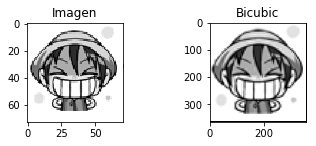

In [21]:
#Bicubic
def cubic(p, t):
    a = -p[0] / 2.0 + (3.0*p[1]) / 2.0 - (3.0*p[2]) / 2.0 + p[3] / 2.0;
    b = p[0] - (5.0*p[1]) / 2.0 + 2.0*p[2] - p[3] / 2.0
    c = -p[0] / 2.0 + p[2] / 2.0
    d = p[1]
    return a*t*t*t + b*t*t + c*t + d

def clamp(v, minv, maxv):
    if (v < minv):
        return minv
    else:
        if (v > maxv):
            return maxv
    return v

def bicubic(pixels,x,y):
    arr = np.zeros((4,1))
    arr[0] = cubic(pixels[0], y)
    arr[1] = cubic(pixels[1], y)
    arr[2] = cubic(pixels[2], y)
    arr[3] = cubic(pixels[3], y)
    return cubic(arr, x)

print("Para escalado  X5")
start_time = time.time()
reziceBC_img = resize(img,5,"BC")
print("--- Tiempo en segundos %s ---" % (time.time() - start_time))
print("--- Tamaño : " + str(img.shape[:2][0]*img.shape[:2][1]))

plt.figure(1)
plt.subplot(221), plt.imshow(img, cmap=plt.cm.gray), plt.title('Imagen')
plt.subplot(222), plt.imshow(reziceBC_img, cmap=plt.cm.gray,interpolation='none'), plt.title('Bicubic')

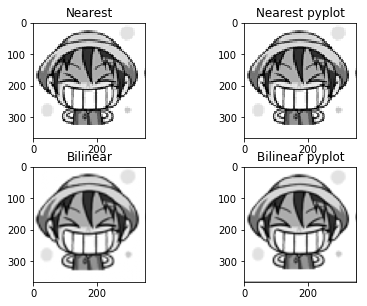

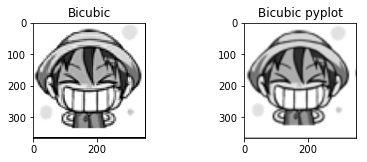

In [23]:
#Comparacion metodos pyplot
plt.figure(1)

plt.subplot(221), plt.imshow(reziceN_img, cmap=plt.cm.gray,interpolation='none'), plt.title('Nearest')
plt.subplot(222), plt.imshow(reziceN_img, cmap=plt.cm.gray,interpolation='nearest'), plt.title('Nearest pyplot')

plt.subplot(223), plt.imshow(reziceBL_img, cmap=plt.cm.gray,interpolation='none'), plt.title('Bilinear')
plt.subplot(224), plt.imshow(reziceN_img, cmap=plt.cm.gray,interpolation='bilinear'), plt.title('Bilinear pyplot')
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0.25, wspace=0.35)

plt.figure(2)
plt.subplot(221), plt.imshow(reziceBC_img, cmap=plt.cm.gray,interpolation='none'), plt.title('Bicubic')
plt.subplot(222), plt.imshow(reziceN_img, cmap=plt.cm.gray,interpolation='bicubic'), plt.title('Bicubic pyplot')

plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0.25, wspace=0.35)

plt.show()


In [24]:
#imagenes en ventanas para ver el escalado
cv2.imshow("normal",img)
cv2.imshow("near",reziceN_img)
cv2.imshow("bilinear",reziceBL_img)
cv2.imshow("bicubic",reziceBC_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

<h1 style="font-size:100%; background-color:rgba(70, 0, 700, 0.2); color:black; text-align:center; line-height : 30px;">  </h1>
# Punto 2
Evaluar cuantitativamente el desempeño de las técnicas de interpolación implementadas


(<matplotlib.axes._subplots.AxesSubplot at 0x11ea79f50>,
 <matplotlib.text.Text at 0x11efac890>)

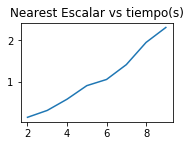

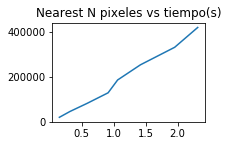

In [84]:
times_nearest = []
sizes = []
for i in range(2,10):
    start_time = time.time()
    reziceN_img = resize(img,i,"N")
    times_nearest.append(time.time() - start_time)
    sizes.append(int(reziceN_img.shape[:2][0]*reziceN_img.shape[:2][1]))
    
plt.figure(1)
plt.subplot(221), plt.plot(range(2,10),times_nearest), plt.title('Nearest Escalar vs tiempo(s)')
plt.figure(2)
plt.subplot(221), plt.plot(times_nearest,sizes), plt.title('Nearest N pixeles vs tiempo(s)')

    

(<matplotlib.axes._subplots.AxesSubplot at 0x11f2aea10>,
 <matplotlib.text.Text at 0x11f2c8950>)

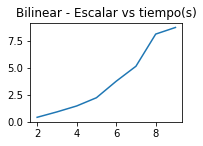

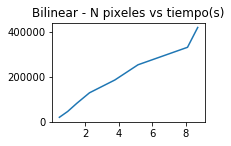

In [87]:
times_BL = []
sizes = []
for i in range(2,10):
    start_time = time.time()
    reziceN_img = resize(img,i,"BL")
    times_BL.append(time.time() - start_time)
    sizes.append(int(reziceN_img.shape[:2][0]*reziceN_img.shape[:2][1]))
    
plt.figure(1)
plt.subplot(221), plt.plot(range(2,10),times_BL), plt.title('Bilinear - Escalar vs tiempo(s)')
plt.figure(2)
plt.subplot(221), plt.plot(times_BL,sizes), plt.title('Bilinear - N pixeles vs tiempo(s)')

   

(<matplotlib.axes._subplots.AxesSubplot at 0x11ef18990>,
 <matplotlib.text.Text at 0x11eac7bd0>)

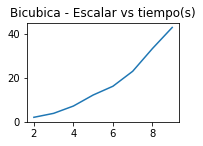

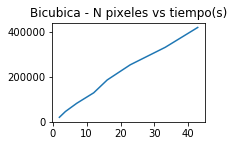

In [89]:
times_BC = []
sizes = []
for i in range(2,10):
    start_time = time.time()
    reziceN_img = resize(img,i,"BC")
    times_BC.append(time.time() - start_time)
    sizes.append(int(reziceN_img.shape[:2][0]*reziceN_img.shape[:2][1]))
    
plt.figure(1)
plt.subplot(221), plt.plot(range(2,10),times_BC), plt.title('Bicubica - Escalar vs tiempo(s)')
plt.figure(2)
plt.subplot(221), plt.plot(times_BC,sizes), plt.title('Bicubica - N pixeles vs tiempo(s)')

   

## Analisis graficas

### Algoritmo nearest :
Podemos ver en la gráfica de Escala vs. tiempo que este algoritmo es rápido y que al parecer tiene un comportamiento lineal. En la gráfica de N píxeles vs. tiempo podemos ver que no se demora mucho en procesar los píxeles de la imagen, aunque este valor crece también de una forma lineal.
Al comparar el algoritmo implementado y el algoritmo de la librería de plot, podemos ver que el resultado es completamente igual, adicionalmente comparando la calidad de interpolación con los otros métodos se nota que este deja la imagen mas pixelada.

### Algoritmo Bilinear:
Podemos ver en la gráfica de Escala vs.. tiempo que este algoritmo es más lento que el anterior y que al parecer tiene una comportamiento cuadrático. En la gráfica de N píxeles vs. tiempo podemos ver que este se demora procesando los píxeles mucho más, pero como es de esperar el tiempo de procesamiento de estos sigue un comportamiento lineal.

Al comparar el algoritmo implementado y el algoritmo de la librería de plot, podemos ver que el resultado es completamente igual, este suaviza la imagen al escalarla.

### Algoritmo Bicubicó:
Podemos ver en la gráfica de Escala vs. tiempo que este algoritmo es muchísimo más lento que el anterior y que al parecer tiene una comportamiento cuadrático peor que el bilinear. En la gráfica de N píxeles vs. tiempo podemos ver que este se demora procesando los píxeles mucho más casi 500000px/s, pero como es de esperar el tiempo de procesamiento de estos sigue un comportamiento lineal.

Al comparar el algoritmo implementado y el algoritmo de la librería de plot, podemos ver que el resultado es peor,ya que auque se ve un suavizado, se notan algunas lineas entre los pixeles, este suaviza la imagen mucho más que el bilinear al escalarla.

<h1 style="font-size:100%; background-color:rgba(70, 0, 700, 0.2); color:black; text-align:center; line-height : 30px;">  </h1>
<h3>Punto 3</h3>
<p>Desarrollar una función para rotar de imágenes, cuyo parámetro de entrada sea el ángulo de rotación y cuya salida sea la imagen rotada y debidamente interpolada.</p>

(<matplotlib.axes._subplots.AxesSubplot at 0x11683c250>,
 <matplotlib.text.Text at 0x116af68d0>)

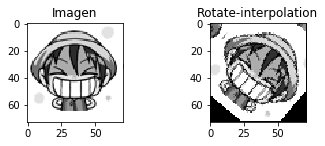

In [3]:
def rotation(image,a):
    width, heigth = image.shape[:2]
    img_rotate = np.zeros((width,heigth),np.uint8)
    no_inter = np.zeros((width,heigth),np.uint8)
    d2r = np.deg2rad(a)
    cosCof = np.cos(d2r)
    sinCof = np.sin(d2r)
    cx = width/2
    cy = heigth/2
    for i in range(width-1):
        for j in range(heigth-1):
            newX = cosCof*(i - cx)- sinCof*(j - cy) + cx
            newY = sinCof*(i - cx) + cosCof*(j - cy) + cy
            if(newX < width-1 and newY < heigth-1):
                img_rotate[i][j] = image[int(newX)][int(newY)]
                #bilinear(image,newX,newY,1,1)
                
    return img_rotate

img_rotate= rotation(img,40)

plt.figure(1)
plt.subplot(221), plt.imshow(img, cmap=plt.cm.gray), plt.title('Imagen')
plt.subplot(222), plt.imshow(img_rotate, cmap=plt.cm.gray,interpolation='none'), plt.title('Rotate-interpolation')
